In [1]:
# Common imports
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import dask
import datetime
import math
import pickle
import pathlib
import seaborn as sns
# Config matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
tab_all= pd.read_csv('tmp/results_allVariables_95/Xtrm_95_table.csv')
tab_all = tab_all[0:4]
tab_25= pd.read_csv('tmp/results_top25/Xtrm_95_table_top25.csv')
tab_20= pd.read_csv('tmp/results_top20/Xtrm_95_table_top20.csv')
tab_15= pd.read_csv('tmp/results_top15/Xtrm_95_table_top15.csv')
tab_10= pd.read_csv('tmp/results_top10/Xtrm_95_table_top10.csv')
tab_5= pd.read_csv('tmp/results_top5/Xtrm_95_table_top5.csv')

In [3]:
#select columns
cols= ['id','n_params','train_xtrm_roc_auc','test_xtrm_roc_auc','train_xtrm_precision','test_xtrm_precision','train_xtrm_recall','test_xtrm_recall']

In [4]:
tab_all = tab_all[cols]
tab_all['N'] = '31'
tab_25 = tab_25[cols]
tab_25['N'] = '25'
tab_20 = tab_20[cols]
tab_20['N'] = '20'
tab_15 = tab_15[cols]
tab_15['N'] = '15'
tab_10 = tab_10[cols]
tab_10['N'] = '10'
tab_5 = tab_5[cols]
tab_5['N'] = '5'


In [5]:
frames= [tab_all, tab_25, tab_20, tab_15, tab_10, tab_5]

In [6]:
df = pd.concat(frames)

In [7]:
# split into train and test for plotting
df_train = df[['id','n_params','train_xtrm_roc_auc','train_xtrm_precision','train_xtrm_recall','N']]
df_test = df[['id','n_params','test_xtrm_roc_auc','test_xtrm_precision','test_xtrm_recall','N']]

In [8]:
df_train.columns = ['id','n_params','AUC','Precision','recall','N']
df_train['data'] = 'train' 
df_test.columns = ['id','n_params','AUC','Precision','recall','N']
df_test['data'] = 'test' 

/scratch/local/29083821/ipykernel_21617/2252291922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['data'] = 'train'
/scratch/local/29083821/ipykernel_21617/2252291922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['data'] = 'test'


In [9]:
dfm = pd.concat([df_train, df_test])

In [77]:
dfm['N'] = dfm['N'].astyastype'int')
dfm['id'] = dfm['id'].astype('str')

In [11]:
df2=pd.melt(dfm, id_vars=[ 'id','n_params', 'N', 'data'],var_name='metrics', value_name='values')

In [12]:
df2['N'] = df2['N'].astype('int')

/storage/homefs/no21h426/.local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


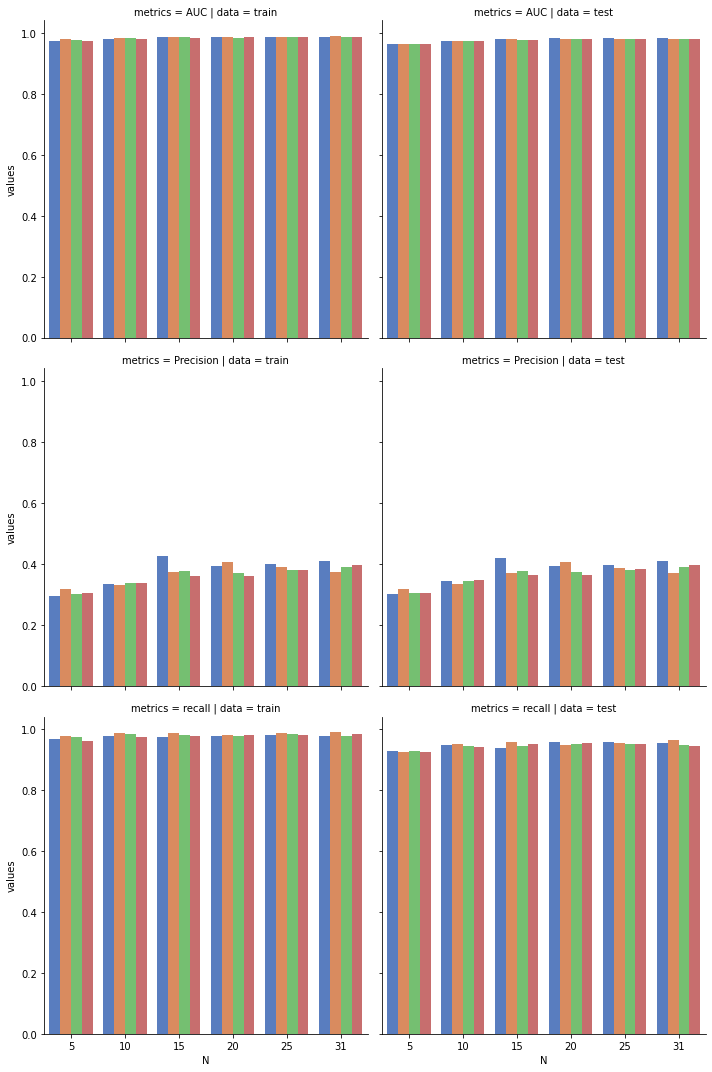

In [112]:
sns.factorplot(x='N',y='values',hue='id',col='data',
                   row='metrics',data=df2,kind='bar',ci=None,legend=False,palette='muted')

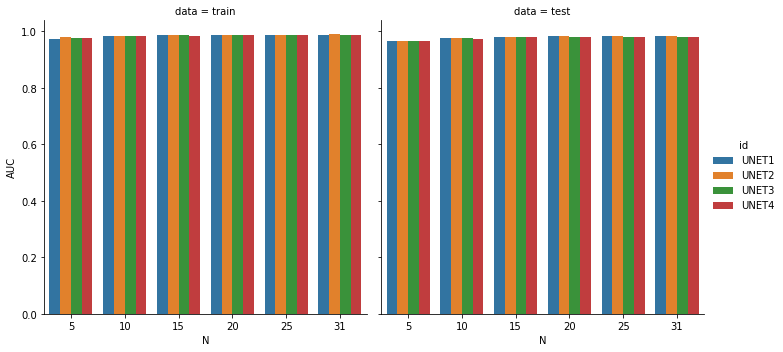

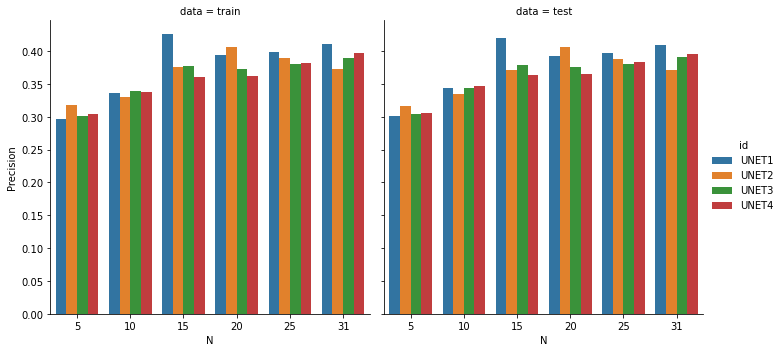

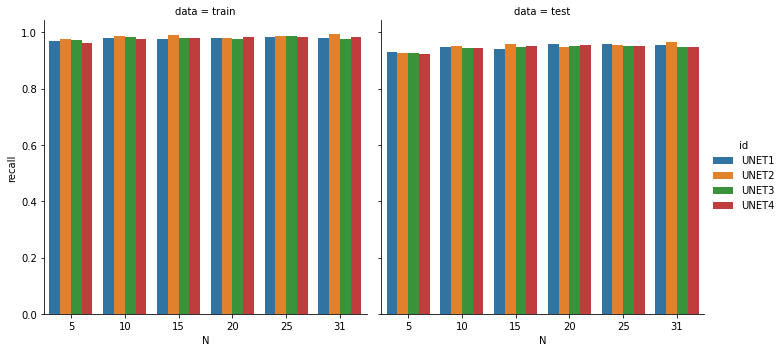

In [13]:
met = ['AUC','Precision', 'recall']
for m in met:
    g = sns.catplot(data=dfm, x='N', y=m, hue='id', col='data', kind='bar', order=dfm.N.sort_values(ascending=True).unique())
    

In [114]:
dfm.to_csv('tmp/data/df_comparison_unet.csv')